In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns', None)

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df5 = pd.read_csv('df5_low.csv')
df5

FileNotFoundError: [Errno 2] File b'df5_low.csv' does not exist: b'df5_low.csv'

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
train, test = train_test_split(dfclean)

NameError: name 'dfclean' is not defined

In [ ]:
train

In [ ]:
test

In [ ]:


f = 'price~bathrooms'
model = ols(formula=f, data=train).fit()
model.summary()

In [ ]:
f1 = 'price~floors'
model = ols(formula=f1, data=train).fit()
model.summary()

In [ ]:
f2 = 'price~condition'
model = ols(formula=f2, data=train).fit()
model.summary()

In [ ]:
f3 = 'price~sqft_living'
model = ols(formula=f3, data=train).fit()
model.summary()

In [ ]:
dfclean['price'].describe()

In [ ]:
result = dfclean[(dfclean['price']< 605001) & (dfclean['price']> 315000)]

In [ ]:
dfclean

In [ ]:
result

In [ ]:
train, test = train_test_split(result)

In [ ]:
train

In [ ]:
test

In [ ]:
f1 = 'price~sqft_living+bedrooms+bathrooms+floors+grade+condition+yr_built'
model = ols(formula=f1, data=train).fit()
model.summary()

In [ ]:
f2 = 'price~sqft_living+bedrooms+bathrooms'
model = ols(formula=f2, data=train).fit()
model.summary()

In [ ]:
f3 = 'price~sqft_living+bedrooms+bathrooms+grade+condition'
model = ols(formula=f3, data=train).fit()
model.summary()

In [ ]:
f4 = 'price~grade+condition+yr_built'
model = ols(formula=f4, data=train).fit()
model.summary() 

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (20,10) )
for xcol, ax in zip(['bedrooms', 'bathrooms', 'grade', 'condition', 'sqft_living', 'sqft_lot', 'floors'], axes):
    train.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha = 0.4, color = 'b')

In [6]:
train

NameError: name 'train' is not defined

NameError: name 'train' is not defined

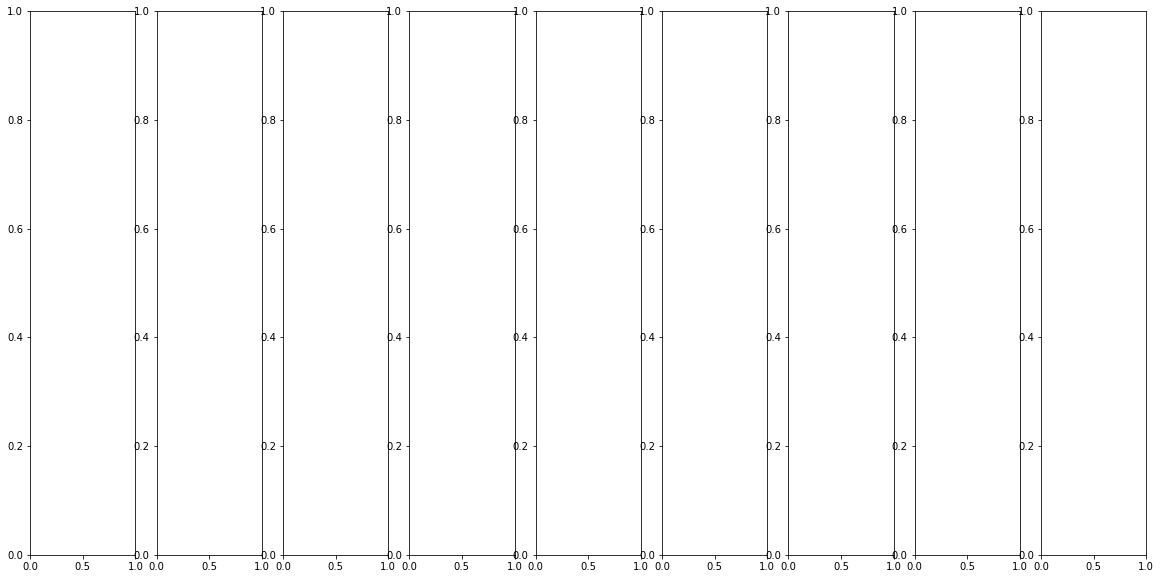

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 9, figsize = (20,10) )
for xcol, ax in zip(['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'], axes):
    train.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha = 0.4, color = 'b')

In [ ]:
fgrade = 'price~grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12'
model = ols(formula=fgrade, data=train).fit()
model.summary() 

In [ ]:
df5 = df5.rename(columns={'bath_0.75':'bath_0_75', 'bath_1.0':'bath_1_0', 'bath_1.25':'bath_1_25', \
                                        'bath_1.5':'bath_1_5', 'bath_1.75':'bath_1_75', 'bath_2.0':'bath_2_0', \
                                        'bath_2.25':'bath_2_25', 'bath_2.5':'bath_2_5', 'bath_2.75':'bath_2_75', \
                                        'bath_3.0':'bath_3_0', 'bath_3.25':'bath_3_25', 'bath_3.5':'bath_3_5'})

In [ ]:
outcome = 'price'
predictors = train.drop(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', \
                             'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [ ]:
model.summary()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

In [ ]:
outcome = 'price'
predictors = df5.drop(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', \
                             'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df5).fit()

In [ ]:
df5

In [ ]:
f1 = 'price~grade_8+sqft_living+ sqft_living15+yr_built+bath_0_75+bath_1_0+bath_1_5+bath_1_75+bath_2_0'
model = ols(formula=f1, data=df5).fit()
model.summary()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
plt.show()

In [ ]:
df

In [ ]:
dumdf.describe()

In [ ]:
dumdf= pd.get_dummies(df['bedrooms'], prefix='br')
dumdf = pd.concat([df, dumdf], axis=1)
dumdf

In [ ]:
dumdf1= pd.get_dummies(df['bathrooms'], prefix='ba')
dumdf2 = pd.concat([dumdf, dumdf1], axis=1)
dumdf2

In [ ]:
,'bedrooms_6','bedrooms_7','bedrooms_8','bedrooms_9','bedrooms_10','bedrooms_11','bedrooms_33', 'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75' , 'bathrooms_8.0'

In [ ]:
dum1= dumdf2.drop(dumdf2.loc[dumdf2['br_6']==0].index, inplace=True)
dum1

In [ ]:
dum1

In [ ]:
dum1

In [ ]:
df3['bedrooms'].value_counts()

In [ ]:
df1 = df.loc[df['bedrooms'] < 5]
df1['bedrooms'].value_counts()

In [ ]:
df2 = df1.loc[df1['bathrooms'] < 4.01]
df2['bathrooms'].value_counts()

In [ ]:
df3 = df2.loc[df2['bathrooms'] > 0.99]
df3['bathrooms'].value_counts()

In [ ]:
dumdf= pd.get_dummies(df3['bedrooms'], prefix='br')
dumdf = pd.concat([df3, dumdf], axis=1)
dumdf

In [ ]:
dumdf1= pd.get_dummies(df3['bathrooms'], prefix='ba')
df4 = pd.concat([dumdf, dumdf1], axis=1)
df4

In [ ]:
df4= df4.drop(['bedrooms', 'bathrooms'], axis=1)
df4

In [ ]:
f = 'price~grade+sqft_living+yr_built+br_1+br_2+br_3+br_4+ba_1_0+ba_1_25+ba_1_5+ba_1_75+ba_2_0+ba_2_25+ba_2_5+ba_2_75+ba_3_0+ba_3_25+ba_3_5+ba_3_75+ba_4_0'
model = ols(formula=f, data=df4).fit()
model.summary()

In [ ]:
df4 = df4.rename(columns={'ba_1.0':'ba_1_0', 'ba_1.25':'ba_1_25', 'ba_1.5':'ba_1_5', 'ba_1.75':'ba_1_75', \
                          'ba_2.0':'ba_2_0', 'ba_2.25':'ba_2_25', 'ba_2.5':'ba_2_5', 'ba_2.75':'ba_2_75', \
                          'ba_3.0':'ba_3_0', 'ba_3.25':'ba_3_25', 'ba_3.5':'ba_3_5', 'ba_3.75':'ba_3_75', \
                          'ba_4.0':'ba_4_0'})

In [ ]:
df4

In [ ]:
df4.describe()

In [ ]:
corr = df4.corr()
display(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='rainbow', mask = mask, annot=True, center=0)

In [ ]:
df4

In [ ]:
df5 = df4[(df4['price']< 438000) & (df4['price']> 154000)]
df5

In [ ]:
ff = 'price~grade+sqft_living+yr_built+br_1+br_2+br_3+br_4+ba_1_0+ba_1_25+ba_1_5+ba_1_75+ba_2_0+ba_2_25+ba_2_5+ba_2_75+ba_3_0+ba_3_25+ba_3_5+ba_3_75+ba_4_0'
model = ols(formula=ff, data=df5).fit()
model.summary()

In [ ]:
df4.to_csv(r'C:\Users\melfr\Documents\Flatiron\p2\PhaseProject\KingHousing\data\meldf.csv')

In [8]:
df4 = pd.read_csv('meldf.csv')
df4

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19476,21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
19477,21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19478,21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19479,21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
# Create an interaction term from 2 variables
df5= df4
df5['brba_comb'] = (df['bedrooms'] * df['bathrooms'])
df5['sqft_perc'] = (df['sqft_living'] / df['sqft_lot'])
df5.head()

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0,brba_comb,sqft_perc
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.208850
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.75,0.354874
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.00,0.077000
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,12.00,0.392000
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.00,0.207921


In [10]:
f = 'price~grade+sqft_living+brba_comb+yr_built+lat'
model = ols(formula=f, data=df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     6823.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:33:47   Log-Likelihood:            -2.6375e+05
No. Observations:               19481   AIC:                         5.275e+05
Df Residuals:                   19475   BIC:                         5.276e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.016e+07   4.92e+05    -40.955      0.000   -2.11e+07   -1.92e+07
grade        1.205e+05   1945.115     61.934      0.000    1.17e+05    1.24e+05
sqft_living   157.5132      2.516     62.598      0.000     152.581     162.445
brba_comb     -56.0062    315.117     -0.178      0.859    -673.662     561.650
yr_built    -2737.8023     52.001    -52.649      0.000   -2839.729   -2635.876
lat          5.223e+05   9711.037     53.787      0.000    5.03e+05    5.41e+05
==============================================================================
Omnibus:                    13653.186   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432728.352
Skew:                           2.971   Prob(JB):                         0.00
Kurtosis:                      25.311   Cond. No.                     1.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df5['lat'].mean()

47.558364154817525

In [ ]:
group46 = []
group47 = []
group45 = []
group44 = []
def latitudesplit():
    for lat in df5['lat']:
        if lat < 47.70 & lat >= 47.60:
            group46.append(lat)
        if lat < 47.80 & lat >= 47.70:
            group47.append(lat)
        if lat < 47.60 & lat >= 47.50:
            group45.append(lat)
        if lat < 47.50 & lat >= 47.40:
            group44.append(lat)
        else:
            None
    print(group46)
    print(group47)
    print(group45)
    print(group44)
        

In [13]:
df5

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0,brba_comb,sqft_perc
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.208850
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.75,0.354874
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.00,0.077000
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,12.00,0.392000
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.00,0.207921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19476,21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13.00,0.587248
19477,21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7.50,0.286044
19478,21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.50,0.162338
19479,21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.00,0.106944


In [17]:
df5['latlong'] = str(df5['lat']) + str(df5['long'])
df5

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0,brba_comb,sqft_perc,latlong
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.208850,0 47.5112\n1 47.7210\n2 4...
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.75,0.354874,0 47.5112\n1 47.7210\n2 4...
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.00,0.077000,0 47.5112\n1 47.7210\n2 4...
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,12.00,0.392000,0 47.5112\n1 47.7210\n2 4...
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.00,0.207921,0 47.5112\n1 47.7210\n2 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19476,21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13.00,0.587248,0 47.5112\n1 47.7210\n2 4...
19477,21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7.50,0.286044,0 47.5112\n1 47.7210\n2 4...
19478,21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.50,0.162338,0 47.5112\n1 47.7210\n2 4...
19479,21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.00,0.106944,0 47.5112\n1 47.7210\n2 4...


In [25]:
pd.cut(df5['lat'], bins=6)

0         (47.467, 47.57]
1        (47.674, 47.778]
2        (47.674, 47.778]
3         (47.467, 47.57]
4         (47.57, 47.674]
               ...       
19476     (47.467, 47.57]
19477     (47.57, 47.674]
19478    (47.674, 47.778]
19479     (47.467, 47.57]
19480     (47.467, 47.57]
Name: lat, Length: 19481, dtype: category
Categories (6, interval[float64]): [(47.155, 47.26] < (47.26, 47.363] < (47.363, 47.467] < (47.467, 47.57] < (47.57, 47.674] < (47.674, 47.778]]

In [27]:
df5.head()

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0,brba_comb,sqft_perc,latlong
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.208850,0 47.5112\n1 47.7210\n2 4...
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.75,0.354874,0 47.5112\n1 47.7210\n2 4...
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.00,0.077000,0 47.5112\n1 47.7210\n2 4...
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,12.00,0.392000,0 47.5112\n1 47.7210\n2 4...
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.00,0.207921,0 47.5112\n1 47.7210\n2 4...


In [ ]:
!pip install jupyterlab "ipywidgets==7.5"
!jupyter labextension install jupyterlab-plotly@4.12.0

In [ ]:
!pip install nodejs
!pip install npm
npm install --save plotlywidget

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
!pip install plotly-geo==1.0.0

In [ ]:
df4['long'].dtype

In [ ]:
import plotly.express as px
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import cufflinks as cf
import plotly.offline
import seaborn as sns
import matplotlib.pyplot as plt
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plotly.offline.init_notebook_mode()
py.init_notebook_mode()


fig = px.scatter_mapbox(data_frame=df5, lat=df5['lat'], lon=df5['long'], color="price",
                  color_continuous_scale=px.colors.cyclical.mygbm, size_max=15, zoom=8)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

#fig = go.Figure(data=go.Scattergeo(
        #lon = df4['long'],
        #lat = df4['lat'],
        #mode = 'markers',
        #marker_color = df4['price'],
        #))

#fig.show()

In [ ]:
df4

In [ ]:
df5.shape